# 1. Introduction: ```scipy.stats``` module

The SciPy library has many modules, each aiming to solve or handle specific purposes related to science. The scope of the modules themselves can be daunting, and without knowing when and where to use them, it is easy to overlook the library's usefulness. This exercise sticks to using one of the basic module called ```scipy.stats```. 

```scipy.stats``` contains a large number of probabilitiy distributions and statistical functions. It is an extension to NumPy's own stats module, though the number and variety of functions are much more diverse.

The SciPy library has its own [documentation](https://docs.scipy.org/doc/scipy/reference/), which you could refer to.

# 2. Loading libraries and dataset

You can import specific modules of SciPy using ```import scipy.[module_name]``` format. Note that it is convention to import specific module directly to the workspace for SciPy. This avoids possible clash of named global variables that are defined in other modules. 

Also note that SciPy is built on top of NumPy, NumPy is automatically imported too when SciPy is imported. However, calling NumPy separately avoids any confusion when calling a module specific function.

In [2]:
# import libraries numpy, pandas, and scipy.stats module

import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
# import dataset using pd.read_csv() function
df = pd.read_csv("anorexia.csv")

In [4]:
# view first few rows of the dataset using pandas dataframe.head() function
df.head()

,ID,group,prewt,postwt,difwt
0,101,1,80.5,82.2,1.7
1,201,2,80.7,80.2,-0.5
2,301,3,83.8,95.2,11.4
3,102,1,84.9,85.6,0.7
4,202,2,89.4,80.1,-9.3


This dataset contains the recorded weights of anorexic patients before and after a treatment.

* Group 1: Behavioural therapy
* Group 2: Control group
* Group 3: Family therapy

We can use various statistical tools in the scipy.stats module to perform descriptive statistics and statistical tests.

# 3. Statistical tests

## 3-1. Are the weights normally distributed? (Normality tests)

There are various ways in which we can test if a given set of data is normally distributed or not.

Here we introduce these:
* [```scipy.stats.normaltest(x)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#r676), where x is the data array
* [```scipy.stats.shapiro(x)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), where x is the data array

Both tests are used to determine whether or not a dataset comes from a normal distribution. For both tests, the hypothesis is as follows:

* H0: Sample comes from a normal distribution
* H1: Sample does not come from a normal distribution.

As in the case of the modules, you can access functions of stats module using ```stats.[function_name]``` format.

In [5]:
# use the normaltest function to find the test statistic and p-value
# of 'prewt', 'postwt', and 'difwt' column, and print each of them.
# since pandas dataframe is also built on top of arrays,
# you can use the dataframe column selection method directly to use the normaltest

print("pre-weight normal test:",stats.normaltest(df['prewt']))
print("\npost-weight normal test:",stats.normaltest(df['postwt']))
print("\nweight difference normal test:",stats.normaltest(df['difwt']))

pre-weight normal test: NormaltestResult(statistic=0.071823327312827978, pvalue=0.96472551004332929)

post-weight normal test: NormaltestResult(statistic=4.8722290987578134, pvalue=0.08750016942113438)

weight difference normal test: NormaltestResult(statistic=2.1365312271308587, pvalue=0.34360394293797336)


As you can see, the function returns 2 values: the test statistic, and the p-value. If you want to access a particular value of the two, you can use the slicing method or assign both values to a new variable at the same time.

```
# slicing:
p_value = stats.normaltest(x)[1]

# variable assignment
test_statistic, p_value = stats.normaltest(x)
```

The normaltest uses kurtosis and skewness to test normality. We can check the actual kurtosis and skewness values by using [```stats.kurtosis```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) and [```stats.skew```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) functions (note: kurtosis returns excess kurtosis value). You can also run a separate tests using [```stats.kurtosistest```](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.kurtosistest.html) and [```stats.skewtest```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.skewtest.html). 

In [6]:
# find the excess kurtosis and skewness values
# of'prewt', 'postwt', and 'difwt' columns, and the print the values
# using stats.kurtosis(x) and stats.skew(x)

print("pre-weight excess kurtosis:", stats.kurtosis(df['prewt']))
print("pre-weight skewness:", stats.skew(df['prewt']))

print("\npost-weight excess kurtosis:", stats.kurtosis(df['postwt']))
print("post-weight skewness:", stats.skew(df['postwt']))

print("\nweight difference excess kurtosis:", stats.kurtosis(df['difwt']))
print("weight difference skewness:", stats.skew(df['difwt']))

pre-weight excess kurtosis: -0.08451214729066026
pre-weight skewness: -0.04790844505142429

post-weight excess kurtosis: -0.7529474965734595
post-weight skewness: 0.37246586066772885

weight difference excess kurtosis: -0.5587219355778057
weight difference skewness: 0.28246899415470783


Just to verify the normality, use the [```stats.shapiro(x)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function to conduct the shapiro test on the columns.

In [7]:
# use the shapiro function to find the test statistic and p-value
# of 'prewt', 'postwt', and 'difwt' column, and print each of them.
# shapiro test also returns test-statistic and p-value respectively

print("pre-weight shapiro test:",stats.shapiro(df['prewt']))
print("\npost-weight shapiro test:",stats.shapiro(df['postwt']))
print("\nweight difference shapiro test:",stats.shapiro(df['difwt']))

pre-weight shapiro test: (0.9924839735031128, 0.948354184627533)

post-weight shapiro test: (0.9673006534576416, 0.05781174451112747)

weight difference shapiro test: (0.974664568901062, 0.15441827476024628)


## 3-2. Have people's weight changed in general before and after the treatments? (one-sample t-test)

Since we already have the values for difference in weight pre and post treatment, we can use one-sample paired t-test on the 'difwt' column to see whether there is a significant change in weights, where the hypothesis is:

* H0: Mean difference is equal to 0
* H1: Mean difference is not equal to 0

We can use the [```stats.ttest_1samp(x, mean)```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html) to conduct the one-sample t-test, where x is the data and mean is the population mean you want to test the data against (in this case, 0). The function returns the test statistic and the p-value respectively.

In [8]:
# Use the stats.ttest_1samp function to see whether the 'difwt' column
# is different from population mean 0
# and print the result
print(stats.ttest_1samp(df['difwt'], 0))

Ttest_1sampResult(statistic=2.9375697188906669, pvalue=0.0044577180786701566)


## 3-3. Have people's weight really change as a result of the treatments? (paired t-test)

Now we can check if the actual differences have changed using a paired t-test, as each pre-weight and post-weight has to match for each individual. The hypothesis is similar:

* H0: Mean(preweight) = Mean(postweight)
* H1: Mean(preweight) != Mean(postweight).

We can use the [```stats.ttest_rel(a,b)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) to conduct a paired t-test, where a and b are each of the samples. The function returns the test-statistic and the p-value respectively.

In [9]:
# use the stats.ttest_rel function to see whether the values of 'prewt' and 'postwt'
# for each individual are significantly different
# and print the result
print(stats.ttest_rel(df['prewt'], df['postwt']))

Ttest_relResult(statistic=-2.9375697188906673, pvalue=0.0044577180786701479)


## 3-4. Are the effect of each treatment different from one another? (one-way ANOVA)

Since there are 3 groups, we need to use the ANOVA test to determine whether or not the means (difference in weight) are the same. The hypothesis is as follows:

* H0: Mean(group1) = Mean(group2) = Mean(group3)
* H1: at least one pair has different means

We can use the [```stats.f_oneway(a,b,c...)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to conduct a one-way anova test, where a, b, c.. are each of the samples. The function returns the test statistic and the p-value respectively.

In [148]:
# create separate dataframes for each of the treatment

group_1 = df[df['group'] == 1]
group_2 = df[df['group'] == 2]
group_3 = df[df['group'] == 3]

In [149]:
# use the stats.f_oneway function to see whether the means of 'difwt' column
# are significantly different for at least one pair
print(stats.f_oneway(group_1['difwt'], group_2['difwt'], group_3['difwt']))

# you can carry out additional tukey's test using
# the statsmodels library :)

F_onewayResult(statistic=5.4222968682382708, pvalue=0.0064986529806996818)


# Bonus: linear algebra using SciPy

SciPy is the basis of the subsequent python libraries used for machine learning and AI. We'll be looking at one of the functionalities of SciPy to see how the algorithms used in sklearn work in the backend.

The goal of linear regression is to find that one regression line that best explains the relationship between a set of predictor variables and a single target variable. The 'best' line is the one that minimizes the squared values of the residuals (abs(observed - expected)). You can use the ```linalg.lstsq``` function from the ```scipy.linalg``` module to find to find the line that minimizes the linear least-squares.

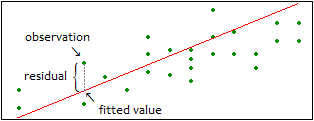

In [151]:
# example of calculating OLS based on regression line
from IPython.display import Image
Image(filename='ols.png')

We will use the anoerxia data again and try to explain the postweight based on pre-weight. We will find the best line that minimizes the least squared values using the ```linalg.lstsq``` function.

In [163]:
# import linalg module from scipy
from scipy import linalg as linalg

# import matplotlib.pyplot to plot graphs
import matplotlib.pyplot as plt
%matplotlib inline

The [```linalg.lstsq(a,b)```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) function requires 2 parameters. a is a matrix of predictor variables, while b is an array of target variable. In this example, a would be the pre-weight and the target variable would be the post-weight data.

The function returns 4 values, which you can check out the details [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html). For right now, we're interested in only the first one, which is an array containing the coefficent m and the intercept constant c.


In [164]:
# transform the prewt and postwt Series as numpy arrays
# using df.as_matrix() function
# this transformation is needed to use the lstsq function

prewt_arr = df.prewt.as_matrix()
postwt_arr = df.postwt.as_matrix()

# verify transformation
print(type(prewt_arr))
print(type(postwt_arr))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [165]:
# transform the preweight array as a matrix
A = np.vstack([prewt_arr, np.ones(len(prewt_arr))]).T

In [166]:
# find the coefficent and the intercept constant
# using the lstsq function
m, c = linalg.lstsq(A,postwt_arr)[0]

print("Coefficent", m)
print("Constant:", c)

Coefficent 0.51538042685
Constant: 42.7005802129


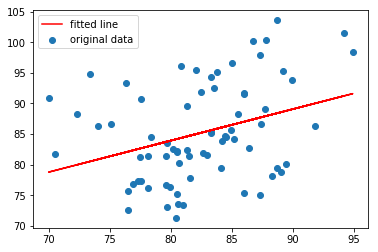

In [168]:
# plot the original data as scatterplot
plt.scatter(prewt_arr, postwt_arr, label = 'original data')

# plot the best fit line based on the least squared values
plt.plot(prewt_arr, (m * prewt_arr + c), 'r', label = 'fitted line')

# show the plot
plt.legend()